In [4]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import matplotlib.pyplot as plt
import numpy as np

In [6]:
import sys
sys.path.insert(0,"/home/deparis/jupyter/pyemma/")
from pyemma import *
%cd "~/Emma"

/home/deparis/Emma


# objectif 
trouver ou ce situe la différence au niveau de la reionisation entre petites et grandes mass d'étoiles

## carte de reionisation 
- dans les filements -> pas de changements mais grandes différence dans les vides
- le point le plus vieux de la carte de dernière reionisation n'est pas dans une zone dense 
- ce point n'est pas le même dans tout les runs
- la différence commence à se faire sentir très tôt.
- la distribution d'étoiles est globalement la même


# Read

In [20]:
runset=db.Runset()
runset.load()
runset.get_description()

00 run de base -> m2
01 masse d'etoile *8 -> m1
02 même masse d'étoile mais pas de SN
03 masse d'etoile *8 mais pas de SN
04 masse d'étoile /8 -> m3
05 même masse d'étoile mais SN thermique
06 même masse d'étoile mais SN kin simple sans eject
07 même masse d'étoile mais SN kin simple avec eject


## Star mass /8

In [207]:
run1=io.Run(runset.runs[1].folder)

In [76]:
run1.param.info.om

0.316

In [22]:
run1.step_00015.grid.x.read()
run1.step_00015.grid.y.read()
run1.step_00015.grid.z.read()
run1.step_00015.grid.l.read()
run1.step_00015.grid.field_d.read()
run1.step_00015.grid.z_last_xion.read()

In [70]:
run1.step_00015.star.x.read(force=1)
# run1.step_00015.star.y.read(force=1)
# run1.step_00015.star.z.read(force=1)
# run1.step_00015.star.age.read(force=1)
# run1.step_00015.star.mass.read(force=1)

## Star mass /64

In [147]:
run2=io.Run(runset.runs[0].folder)

In [148]:
run2.step_00017.grid.x.read()
run2.step_00017.grid.y.read()
run2.step_00017.grid.z.read()
run2.step_00017.grid.l.read()
run2.step_00017.grid.field_d.read()
run2.step_00017.grid.z_last_xion.read()

In [147]:
run2.step_00016.star.x.read(force=1)
run2.step_00016.star.y.read(force=1)
run2.step_00016.star.z.read(force=1)
run2.step_00016.star.age.read(force=1)
run2.step_00016.star.mass.read(force=1)

# Star mass /512

In [72]:
run3=io.Run(runset.runs[4].folder)
# run3=io.Run("/home/deparis/curie_data/data/8_8_gather_10/")

In [73]:
run3.step_00015.grid.x.read()
run3.step_00015.grid.y.read()
run3.step_00015.grid.z.read()
run3.step_00015.grid.l.read()
run3.step_00015.grid.field_d.read()
run3.step_00015.grid.z_last_xion.read()

## Star mass /64 noSN

In [571]:
run4=io.Run("/home/deparis/curie_data/data/8_8_gather_8/")

In [573]:
run4.step_00009.grid.x.read()
run4.step_00009.grid.y.read()
run4.step_00009.grid.z.read()
run4.step_00009.grid.l.read()
run4.step_00009.grid.field_d.read()
run4.step_00009.grid.z_last_xion.read()

grid_x allready loaded, use force=1 to reload
grid_y allready loaded, use force=1 to reload
grid_z allready loaded, use force=1 to reload
grid_l allready loaded, use force=1 to reload
grid_field.d allready loaded, use force=1 to reload
grid_z_last_xion allready loaded, use force=1 to reload


# Associate data

In [197]:
x=run1.step_00015.grid.x.data
y=run1.step_00015.grid.y.data
z=run1.step_00015.grid.z.data
l=run1.step_00015.grid.l.data
# d=run1.step_00015.grid.z_last_xion.data
d=run1.step_00015.grid.field_d.data
# d=run1.step_00015.grid.z_last_xion.data*run1.step_00015.grid.field_d.data

In [204]:
x=run2.step_00017.grid.x.data
y=run2.step_00017.grid.y.data
z=run2.step_00017.grid.z.data
l=run2.step_00017.grid.l.data
# d=run2.step_00017.grid.z_last_xion.data
d=run2.step_00017.grid.field_d.data
# d=run2.step_00016.grid.z_last_xion.data*run2.step_00016.grid.field_d.data

In [496]:
x=run3.step_00015.grid.x.data
y=run3.step_00015.grid.y.data
z=run3.step_00015.grid.z.data
l=run3.step_00015.grid.l.data
d=run3.step_00015.grid.z_last_xion.data

# Projection

In [178]:
# cur_step=run2.step_00016
cur_step=run1.step_00015

arg=np.argmax(cur_step.grid.z_last_xion.data)
xc=cur_step.grid.x.data[arg]
yc=cur_step.grid.y.data[arg]
zc=cur_step.grid.z.data[arg]
print(xc,yc,zc)

# 0.43706572  0.11264391  0.01550834  0.38465187  0.32228306  0.61120176
#   0.83650595  0.94505066  0.8714205 ]
# [ 0.19004589  0.81172776  0.62565511  0.41401145  0.02923461  0.99135876
#   0.59738028  0.61963749  0.40523973]
# [ 0.47513735  0.31878909  0.90639347  0.53040701  0.76387697  0.13797347
#   0.22967069  0.11877646  0.23815541]

xc=0.43706572
yc=0.19004589
zc=0.47513735

0.953125 0.6328125 0.23828125


In [191]:
level=8
dx = 32/2**level
dz = 1 /2**level

xmin=xc-dx
xmax=xc+dx
ymin=yc-dx
ymax=yc+dx
zmin=zc-dz
zmax=zc+dz

# xmin=0.
# xmax=1.
# ymin=0.
# ymax=1.
# zmin=0.
# zmax=1.

print(xmin,xmax)
print(ymin,ymax)
print(zmin,zmax)

0.31206572 0.56206572
0.06504589 0.31504589
0.4712311 0.4790436


In [205]:
projection_level=11
map_d=grid.get_cube(x,y,z,l,d,projection_level,"2d",
                  xmin=xmin,xmax=xmax,
                  ymin=ymin,ymax=ymax,
                  zmin=zmin,zmax=zmax)

In [180]:
mask=np.where(map==np.min(map))
map[mask]=None

In [164]:
cmin=np.nanmin(map)
print(cmin)
cmax=np.nanmax(map)
print(cmax)

0.905213415623
12.8514531255


/usr/local/anaconda3/lib/python3.4/site-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


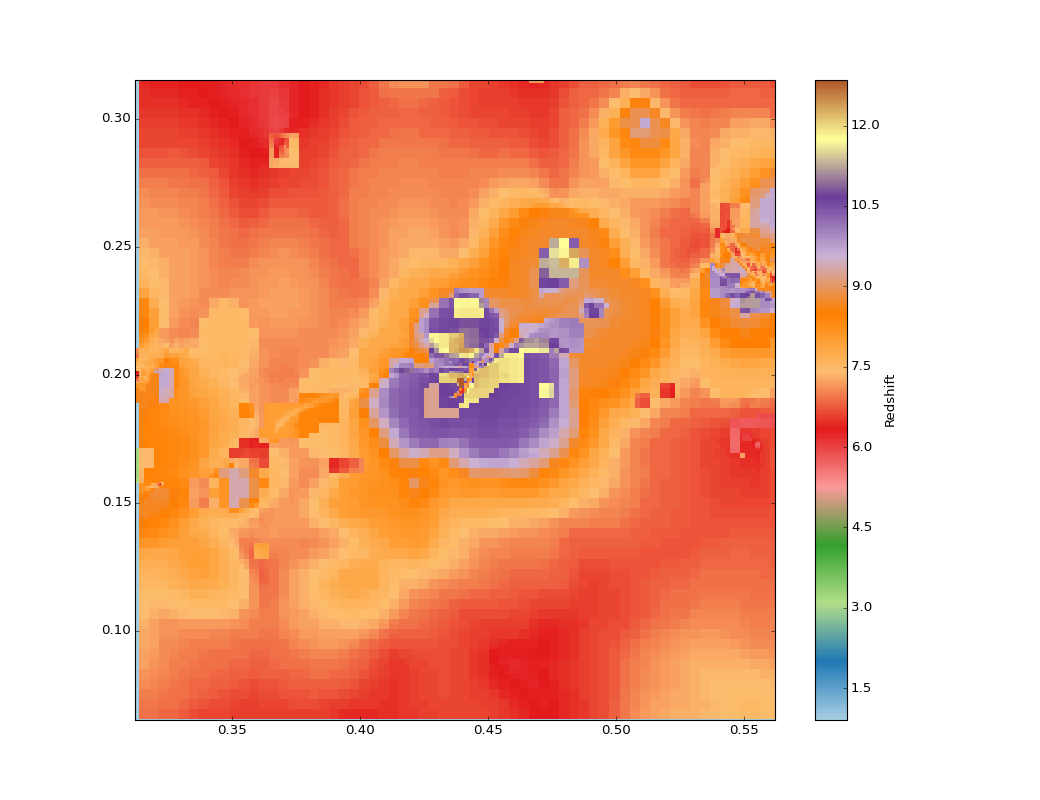

In [194]:
#z_xion map

plt.figure(figsize=(13,10))

plt.imshow(map,interpolation="nearest",cmap="Paired",origin="lower",extent=(xmin,xmax,ymin,ymax),
           
           clim=[cmin,cmax]
          )
#plt.plot(xc,yc,'ko')
# plt.clim(5.6,16.0564918518)
# plt.clim()
# plt.clim(0,1)


clb=plt.colorbar()
clb.set_label("Redshift")
# clb.set_clim(cmin,2.64672288778)

# plt.xlim(0.25,0.55)
# plt.ylim(0.25,0.55)
# plt.xlim(ymin,ymax)
# plt.ylim(xmin,xmax)

In [119]:
import PIL
x=np.array(map_d)
im = PIL.Image.fromarray(np.power(10,x))
im=im.convert('RGB')
im.save("test", "png")

/usr/local/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:3: RuntimeWarning: overflow encountered in power
  app.launch_new_instance()


In [113]:
pwd

'/home/deparis/Emma'

# //////////////////////////////////////////////////////////////////////////////////////////

In [59]:
#get stars 

# cur_step=run2.step_00016
cur_step=run1.step_00015

cur_step.star.x.read()
cur_step.star.y.read()
cur_step.star.z.read()

curx=cur_step.star.x.data
cury=cur_step.star.y.data
curz=cur_step.star.z.data


level=8
dx = 16 /2**level
dz = 1 /2**level

xmin=xc-dx
xmax=xc+dx
ymin=yc-dx
ymax=yc+dx
zmin=zc-dz
zmax=zc+dz

xmin=0.
xmax=1.
ymin=0.
ymax=1.

mask=np.where((curx>=xmin) & (curx<xmax) & (cury>=ymin) & (cury<ymax) & (curz>=zmin) & (curz<zmax))
curx=curx[mask]
cury=cury[mask]

print (len(curx))
# print(cur_step.part.x.read_tsim)

# plt.figure()
# plt.plot(curx,cury,'.')

375


In [127]:
filename = cur_step.star.y._filename + ".p"+ str(0).zfill(5)
with open(filename, "rb") as file:
    dump=np.fromfile(file, dtype=np.int32  ,count=1)[0]
    print("z=",1./np.fromfile(file, dtype=np.float32  ,count=1)[0]   -1   )

z= 11.1821622606


In [58]:
# get fields

level=8
dx = 16 /2**level
dz = 4 /2**level

xmin=xc-dx
xmax=xc+dx
ymin=yc-dx
ymax=yc+dx
zmin=zc-dz
zmax=zc+dz


xmin=0.
xmax=1.
ymin=0.
ymax=1.

projection_level=11


# cur_step=run1.step_00015
cur_step=run2.step_00016

cur_step.grid.x.read()
cur_step.grid.y.read()
cur_step.grid.z.read()
cur_step.grid.l.read()
cur_step.grid.field_d.read()
cur_step.grid.z_last_xion.read()

x=cur_step.grid.x.data
y=cur_step.grid.y.data
z=cur_step.grid.z.data
l=cur_step.grid.l.data

d=cur_step.grid.field_d.data
map_d=grid.get_cube(x,y,z,l,d,projection_level,"2d",
                  xmin=xmin,xmax=xmax,
                  ymin=ymin,ymax=ymax,
                  zmin=zmin,zmax=zmax)


# cur_step=run2.step_00016

cur_step.grid.x.read()
cur_step.grid.y.read()
cur_step.grid.z.read()
cur_step.grid.l.read()
cur_step.grid.field_d.read()
cur_step.grid.z_last_xion.read()

x=cur_step.grid.x.data
y=cur_step.grid.y.data
z=cur_step.grid.z.data
l=cur_step.grid.l.data


xion=cur_step.grid.z_last_xion.data
map_x=grid.get_cube(x,y,z,l,xion,projection_level,"2d",
                  xmin=xmin,xmax=xmax,
                  ymin=ymin,ymax=ymax,
                  zmin=zmin,zmax=zmax)

grid_x allready loaded, use force=1 to reload
grid_y allready loaded, use force=1 to reload
grid_z allready loaded, use force=1 to reload
grid_l allready loaded, use force=1 to reload
grid_field.d allready loaded, use force=1 to reload
grid_z_last_xion allready loaded, use force=1 to reload
grid_x allready loaded, use force=1 to reload
grid_y allready loaded, use force=1 to reload
grid_z allready loaded, use force=1 to reload
grid_l allready loaded, use force=1 to reload
grid_field.d allready loaded, use force=1 to reload
grid_z_last_xion allready loaded, use force=1 to reload


/usr/local/anaconda3/lib/python3.4/site-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


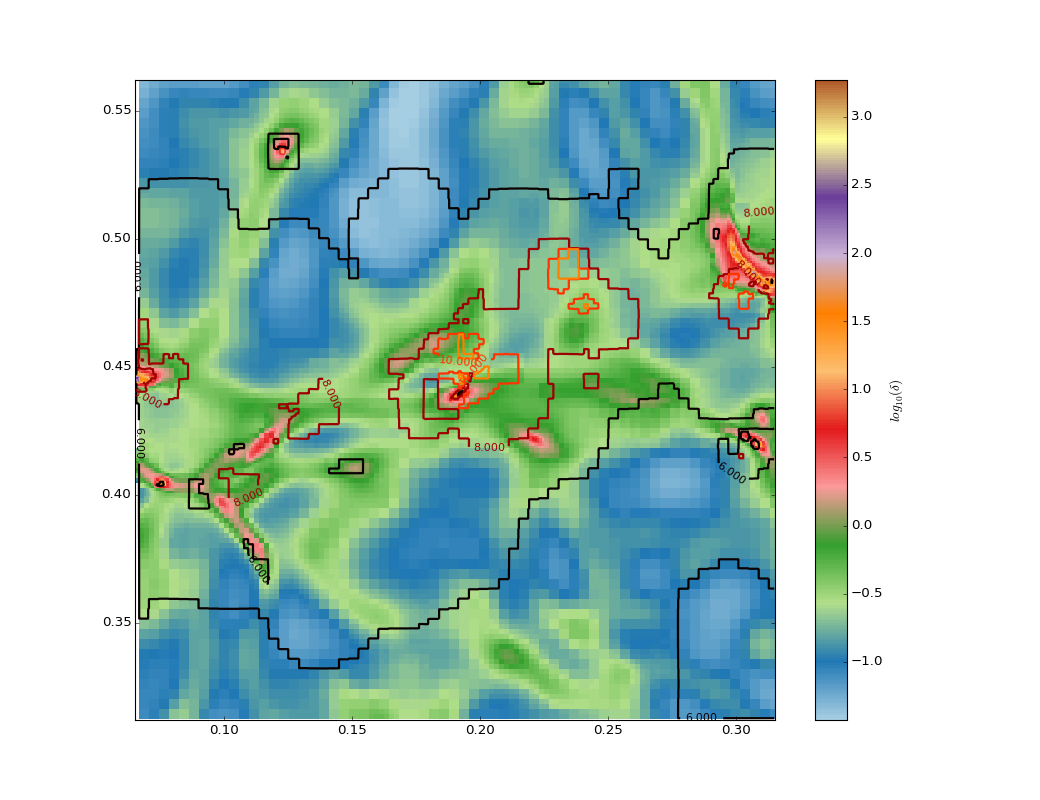

/usr/local/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:7: RuntimeWarning: divide by zero encountered in log10


In [206]:
x0 = np.arange(xmin, xmax, (xmax-xmin) /512 )
y0 = np.arange(ymin, ymax, (ymax-ymin) /512 )
X, Y = np.meshgrid(x0, y0)

plt.figure(figsize=(13,10))

plt.imshow(np.log10(map_d),interpolation="nearest",cmap="Paired",origin="lower",extent=(ymin,ymax,xmin,xmax))
clb=plt.colorbar()
clb.set_label(r"$log_{10}(\delta)$")

# CS = plt.contour(X, Y, map_x,8)#,colors=('r','g','b','y','k'))
# plt.clabel(CS, inline=1, fontsize=10)

levels = [6,8,10,11,12,13,14,15]
CS = plt.contour(map_x, levels,
                 origin='lower',
                 linewidths=2,
                 extent=(ymin,ymax,xmin,xmax))

plt.clabel(CS, inline=1, fontsize=10)
# plt.flag()
plt.hot() 

# plt.plot(cury,curx,'.')

In [160]:
grad = np.gradient(1./map_x)
normgrad = np.sqrt(np.power(grad[0],2) + np.power(grad[1],2))

/usr/local/anaconda3/lib/python3.4/site-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


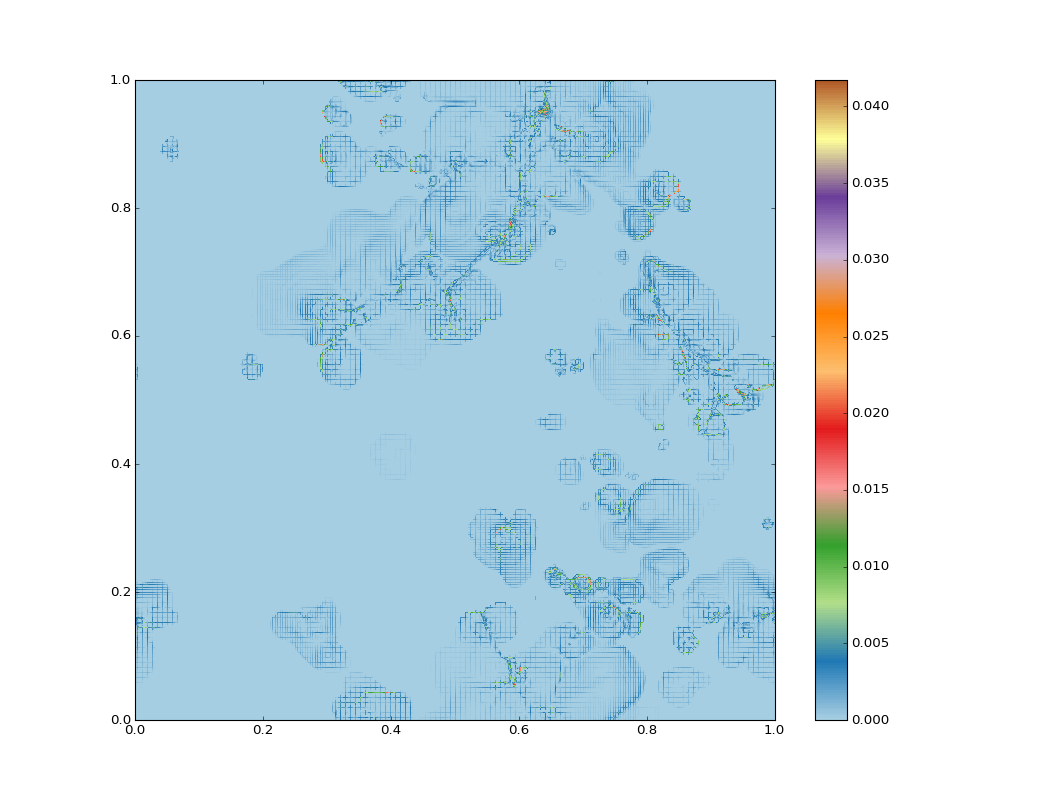

In [161]:
#gradient z_xion map

plt.figure(figsize=(13,10))
plt.imshow(normgrad,interpolation="nearest",cmap="Paired",origin="lower",extent=(xmin,xmax,ymin,ymax))
plt.colorbar()

/usr/local/anaconda3/lib/python3.4/site-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


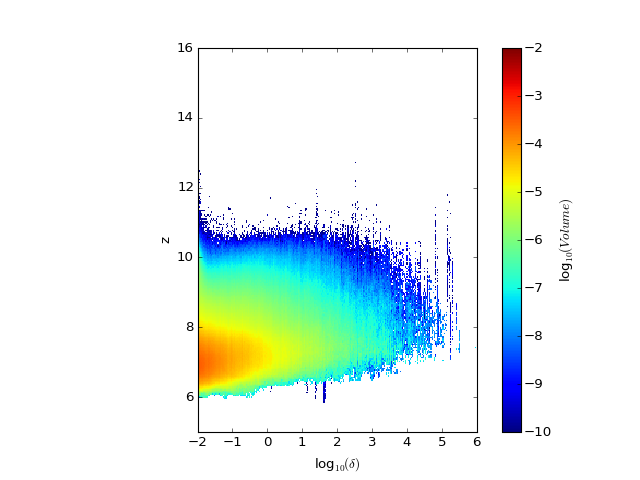

/usr/local/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:17: RuntimeWarning: divide by zero encountered in log10


(5, 16)

In [568]:
# cur_step=run1.step_00015
cur_step=run2.step_00016

x=cur_step.grid.field_d.data
y=cur_step.grid.z_last_xion.data
w=np.power(0.5,3*cur_step.grid.l.data)

mask=np.where(x>0)
x=x[mask]
x=np.log10(x)

y=y[mask]

h,bx,by=np.histogram2d(x,y,bins=256,weights=w)

plt.figure()
plt.imshow(np.log10(h),interpolation="none", origin='lower',extent=(bx[0],bx[-1],by[0],by[-1]))

cbar=plt.colorbar()
cbar.set_label(r"log$_{10}( Volume ) $")

plt.clim(-10,-2)
plt.xlabel(r"log$_{10} (\delta) $")
plt.ylabel("z")
plt.xlim(-2,6)
plt.ylim(5,16)

/usr/local/anaconda3/lib/python3.4/site-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


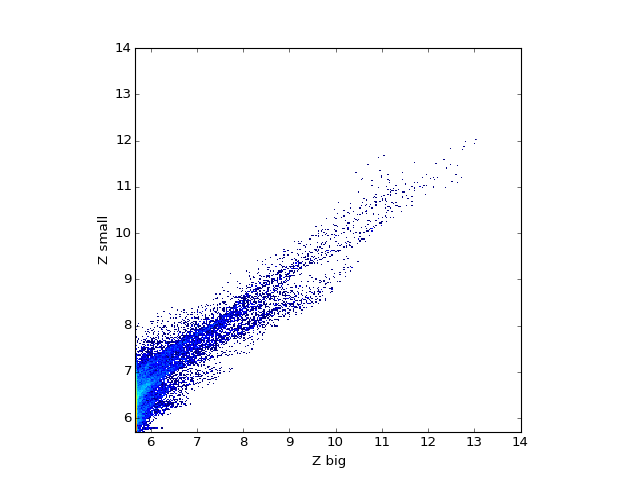

/usr/local/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:7: RuntimeWarning: divide by zero encountered in log10


In [569]:
x=map1.reshape(-1)
y=map2.reshape(-1)

h,bx,by=np.histogram2d(x,y,bins=256)

plt.figure()
plt.imshow(np.log10(h),interpolation="none", origin='lower',extent=(bx[0],bx[-1],by[0],by[-1]))

# x=np.arange(5.6,14,0.1)
# plt.plot(x,x,'k--')

plt.xlim(bx[0],14)
plt.ylim(by[0],14)

plt.xlabel("Z big")
plt.ylabel("Z small")

In [68]:
#####################################################################
data1=run1.step_00015.grid.z_last_xion.data
w1=np.power(0.5,3.*run1.step_00015.grid.l.data)

nbins=128
bins=np.linspace(np.min(data1),np.max(data1),nbins+1)
x=(bins[1:]+bins[:-1])/2

n1,_=np.histogram(data1,bins=bins)
h11,_=np.histogram(data1,bins=bins,weights=w1)
h12,_=np.histogram(data1,bins=bins,weights=w1*w1)
err1 = np.sqrt(h12/n1 - h11*h11/n1/n1)  /np.sqrt(n1) *3.

#####################################################################
data2=run2.step_00016.grid.z_last_xion.data
w2=np.power(0.5,3.*run2.step_00016.grid.l.data)

n2,_=np.histogram(data2,bins=bins)
h21,_=np.histogram(data2,bins=bins,weights=w2)
h22,_=np.histogram(data2,bins=bins,weights=w2*w2)
err2 = np.sqrt(h22/n2 - h21*h21/n2/n2) /np.sqrt(n2) *3.

#####################################################################
data3=run3.step_00015.grid.z_last_xion.data
w3=np.power(0.5,3.*run3.step_00015.grid.l.data)

n3,_=np.histogram(data3,bins=bins)
h31,_=np.histogram(data3,bins=bins,weights=w3)
h32,_=np.histogram(data3,bins=bins,weights=w3*w3)
err3 = np.sqrt(h32/n3 - h31*h31/n3/n3) /np.sqrt(n3) *3.

#####################################################################
# data4=run4.step_00009.grid.z_last_xion.data
# w4=np.power(0.5,3.*run4.step_00009.grid.l.data)

# n4,_=np.histogram(data4,bins=bins)
# h41,_=np.histogram(data4,bins=bins,weights=w4)
# h42,_=np.histogram(data4,bins=bins,weights=w4*w4)
# err4 = np.sqrt(h42/n3 - h41*h41/n4/n4) /np.sqrt(n4) *3.

#####################################################################
plt.figure()

plt.errorbar(x[1:],h11[1:],yerr=err1[1:],label="1/8")
plt.errorbar(x[1:],h21[1:],yerr=err2[1:],label="1/64")
plt.errorbar(x[1:],h31[1:],yerr=err3[1:],label="1/512")
# plt.errorbar(x[1:],h41[1:],yerr=err4[1:],label="1/64 noSN")

plt.legend()

plt.yscale("log")

plt.xlabel("Ionization redshift (threshold=50%)")
plt.ylabel("Volume fraction")

/usr/local/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in true_divide
/usr/local/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in sqrt
/usr/local/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:21: RuntimeWarning: invalid value encountered in true_divide
/usr/local/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:21: RuntimeWarning: invalid value encountered in sqrt


NameError: name 'run3' is not defined

In [66]:
y1=np.cumsum(h11[::-1])[::-1]
y2=np.cumsum(h21[::-1])[::-1]
y3=np.cumsum(h31[::-1])[::-1]
# y4=np.cumsum(h41[::-1])[::-1]

plt.figure()

plt.plot(x[1:],y1[1:],label="1/8")
plt.plot(x[1:],y2[1:],label="1/64")
plt.plot(x[1:],y3[1:],label="1/512")
# plt.plot(x[1:],y4[1:],label="1/64 noSN")

# plt.plot(x[1:],y1[1:]-y2[1:],"k--",label="Big-Small")

plt.legend()
plt.yscale("log")
plt.xlabel("Ionization redshift (threshold=50%)")
plt.ylabel("Cumulative volume fraction")

NameError: name 'h11' is not defined

In [ ]:
data1=run1.step_00015.grid.z_last_xion.data
mask=np.where(data1>14)
data1=data1[mask]

plt.

/usr/local/anaconda3/lib/python3.4/site-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


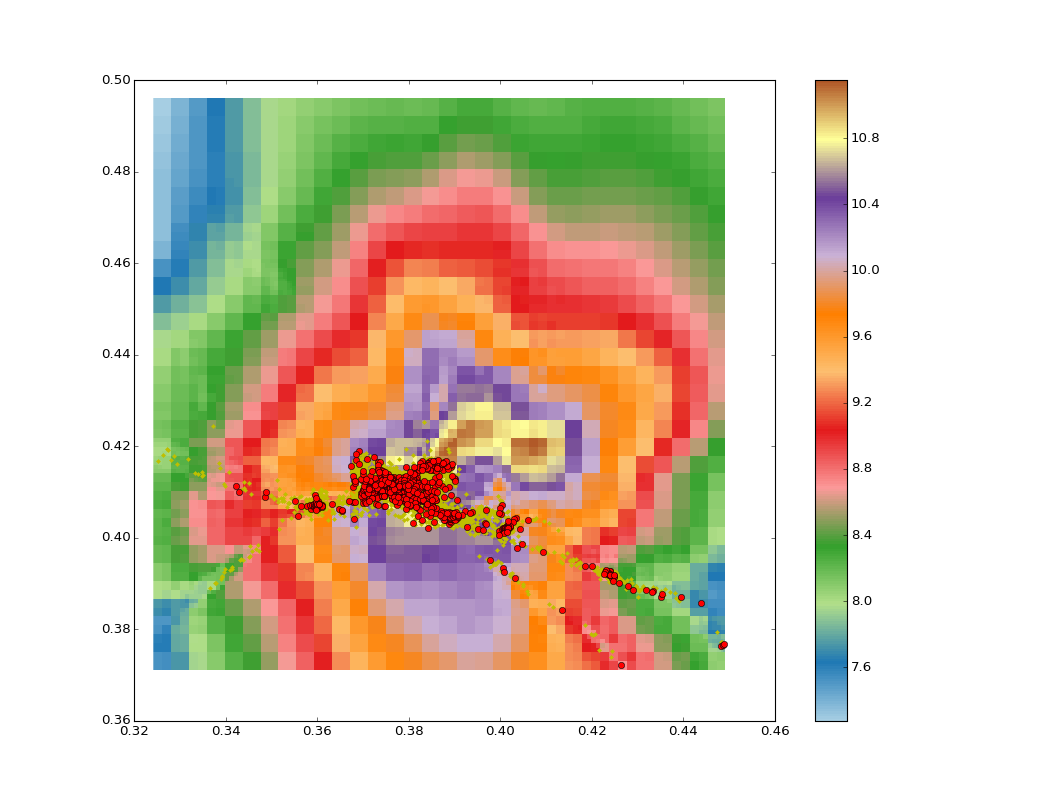

In [682]:
#data=np.max(map1-map2,axis=2)

plt.figure(figsize=(13,10))
plt.imshow(map,interpolation="none",origin="lower",cmap="Paired",extent=(ymin,ymax,xmin,xmax))
# clim=max(np.abs(np.min(data)),np.abs(np.max(data)))
# plt.clim(-clim,clim)



x=run2.step_00016.star.x.data
y=run2.step_00016.star.y.data
z=run2.step_00016.star.z.data
mask=np.where((x>=xmin) & (x<xmax) & (y>=ymin) & (y<ymax) & (z>=zmin) & (z<zmax))
x=x[mask]
y=y[mask]

plt.plot(y,x,'y.')



x=run1.step_00015.star.x.data
y=run1.step_00015.star.y.data
z=run1.step_00015.star.z.data
mask=np.where((x>=xmin) & (x<xmax) & (y>=ymin) & (y<ymax) & (z>=zmin) & (z<zmax))
x=x[mask]
y=y[mask]

plt.plot(y,x,'ro')



# plt.title("Big - small")
plt.colorbar()
# plt.xlim(xmin,xmax)
# plt.ylim(ymin,ymax)

5.47617617919e-10
1.15531151312e-09
6.84522022398e-11
1.4441393914e-10


/usr/local/anaconda3/lib/python3.4/site-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


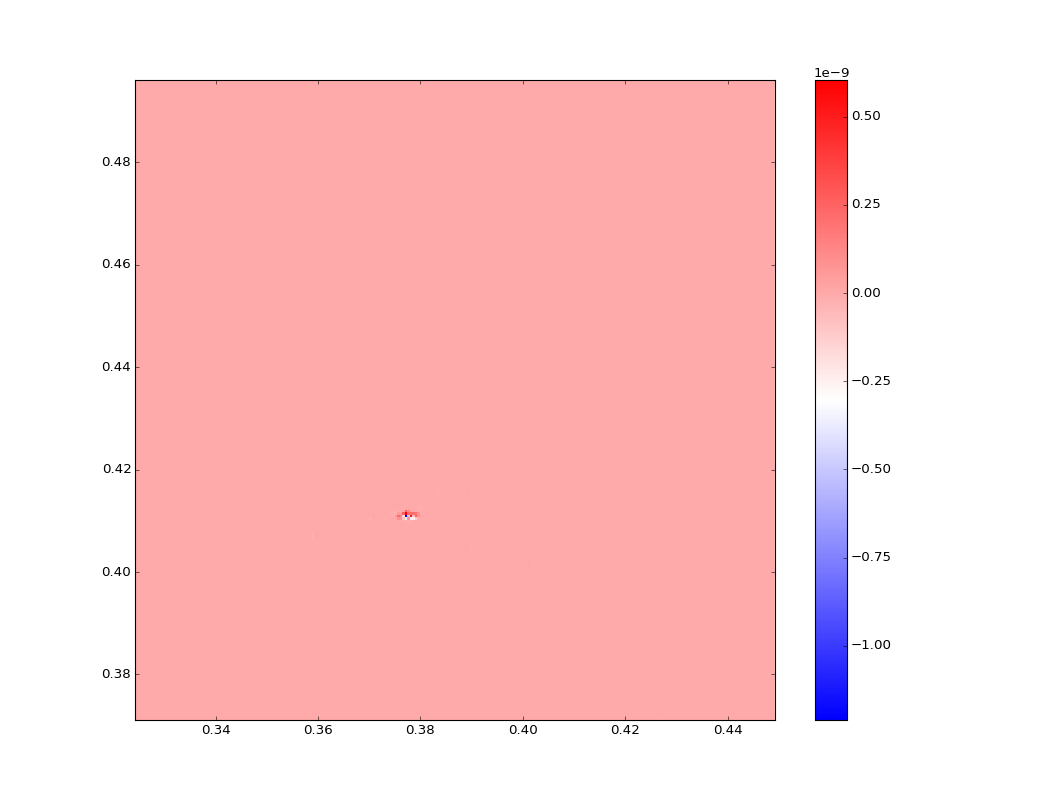

-1.21005448044e-09 6.03834127068e-10 1.21005448044e-09


In [727]:
projection_level=11


cur_step=run1.step_00015
x=cur_step.star.x.data
y=cur_step.star.y.data
z=cur_step.star.z.data
d=cur_step.star.mass.data
print(np.min(d))
print(np.max(d))
l=np.ones(len(x))*projection_level

map1=grid.get_cube(x,y,z,l,d,projection_level,"2d",
                  xmin=xmin,xmax=xmax,
                  ymin=ymin,ymax=ymax,
                  zmin=zmin,zmax=zmax)

# print(np.min(map[map!=0]),np.max(map))
# map=np.log10(map)

cur_step=run2.step_00016
x=cur_step.star.x.data
y=cur_step.star.y.data
z=cur_step.star.z.data
d=cur_step.star.mass.data
l=np.ones(len(x))*projection_level
print(np.min(d))
print(np.max(d))
map2=grid.get_cube(x,y,z,l,d,projection_level,"2d",
                  xmin=xmin,xmax=xmax,
                  ymin=ymin,ymax=ymax,
                  zmin=zmin,zmax=zmax)

plt.figure(figsize=(13,10))

# map= np.log10(np.abs((map1-map2)/map2))
# map= np.log10(np.abs((map1-map2)))
map= map1-map2

plt.imshow(map,interpolation="none",origin="lower",extent=(ymin,ymax,xmin,xmax),cmap="bwr")

# plt.clim(np.log10(2.67391414999e-13), np.log10(5.76022045166e-09))
cmin=np.nanmin(map[np.isfinite(map)])
cmax=np.nanmax(map[np.isfinite(map)])
clim=max(np.abs(cmin),np.abs(cmax))
print(cmin,cmax,clim)
# plt.clim(-clim,clim)

plt.colorbar()

/usr/local/anaconda3/lib/python3.4/site-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


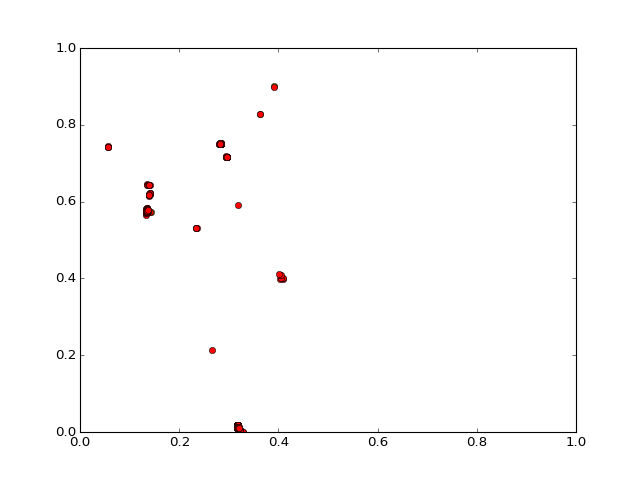

(0, 1)

In [89]:
z=run1.step_00015.star.z.data
mask=np.where( (z>=zmin) & (z<zmax)  )
x1=run1.step_00015.star.x.data[mask]
y1=run1.step_00015.star.y.data[mask]
z1=run1.step_00015.star.z.data[mask]


z=run2.step_00016.star.z.data
mask=np.where( (z>=zmin) & (z<zmax)  )
x2=run2.step_00016.star.x.data[mask]
y2=run2.step_00016.star.y.data[mask]

plt.figure()

plt.plot(x1,y1,'yo')
plt.plot(x2,y2,'ro')

plt.xlim(0,1)
plt.ylim(0,1)

/usr/local/anaconda3/lib/python3.4/site-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


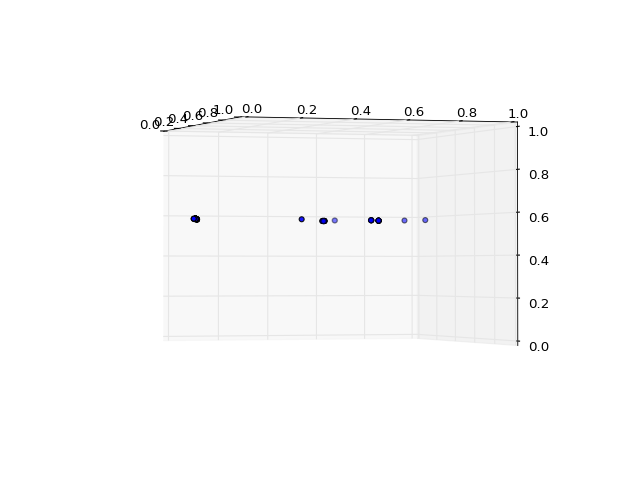

(0, 1)

In [92]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(x1,y1,z1)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_zlim(0,1)

/usr/local/anaconda3/lib/python3.4/site-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


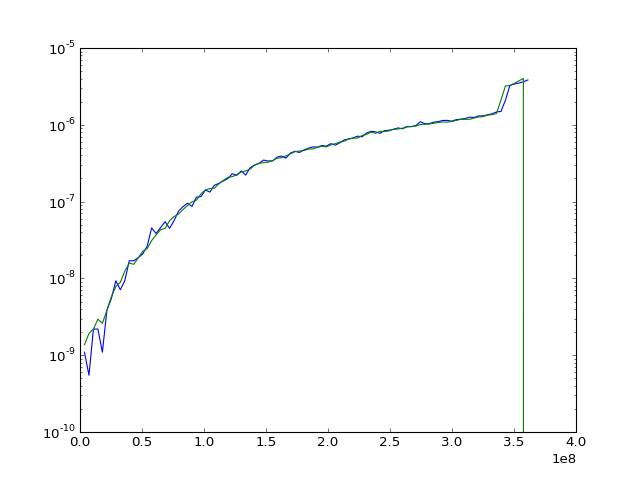

In [167]:
data=run1.step_00015.star.age.data

nbins=100
bins=np.linspace(np.min(data),np.max(data),nbins+1 )
x=(bins[1:]-bins[:1])/2

h1,_=np.histogram(run1.step_00015.star.age.data,bins,weights=run1.step_00015.star.mass.data)
h2,_=np.histogram(run2.step_00016.star.age.data,bins,weights=run2.step_00016.star.mass.data)


plt.figure()
plt.plot(x,h1)
plt.plot(x,h2)

plt.yscale("log")

In [158]:
def R(x,y,z,xc,yc,zc):
    dx = x-xc
    dy = y-yc
    dz = z-yc
    return np.sqrt( np.power(dx,2)+np.power(dx,2)+np.power(dx,2) )


####################################################################################
x=run1.step_00015.star.x.data
y=run1.step_00015.star.y.data
z=run1.step_00015.star.z.data
m=run1.step_00015.star.mass.data

mask=np.where((x>=xmin) & (x<xmax) & (y>=ymin) & (y<ymax) & (z>=zmin) & (z<zmax))
x=x[mask]
y=y[mask]
z=z[mask]
m=m[mask]

r1=R(x,y,z,xc,yc,zc)

print(np.sum(m*r1))

####################################################################################

x=run2.step_00016.star.x.data
y=run2.step_00016.star.y.data
z=run2.step_00016.star.z.data
m=run2.step_00016.star.mass.data

mask=np.where((x>=xmin) & (x<xmax) & (y>=ymin) & (y<ymax) & (z>=zmin) & (z<zmax))
x=x[mask]
y=y[mask]
z=z[mask]
m=m[mask]

r2=R(x,y,z,xc,yc,zc)

print(np.sum(m*r2))

1.10639502895e-07
1.06366260541e-07


In [2]:
import time
import sys

for i in range(100):
    sys.stdout.write("\rDownloading ... %s" % (i))    
    time.sleep(1)

KeyboardInterrupt: 